# Section 1: Import Packages

In [33]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Section 2: Data Preprocessing

#### Tumor Classification

In [34]:
path='./Data'
pd.DataFrame(os.listdir(path),columns=['Files'])

,Files
0,meningioma_tumor
1,glioma_tumor
2,pituitary_tumor
3,normal


#### Data Splitting (70% for training, 10% for validation, 20% for testing)


In [35]:
# Define the directory containing your image data
data_directory = path

# Create a TensorFlow dataset
batch_size = 32
image_size = (224, 224)  # Adjust the size as needed
validation_split = 0.3

# Create a training set
train = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=validation_split,  # 20% of the data for validation
    subset="training",
    seed=123,  # Set a random seed for reproducibility
    image_size=image_size,
    batch_size=batch_size,
)

# Create a validation and test set
val_test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,  # 20% of the data for validation
    subset="validation",
    seed=123,  # Use the same seed for consistency
    image_size=image_size,
    batch_size=batch_size,
)

val_batches = tf.data.experimental.cardinality(val_test_dataset)
test = val_test_dataset.take((2*val_batches) // 3)
validation = val_test_dataset.skip((2*val_batches) // 3)

Found 3096 files belonging to 4 classes.
Using 2168 files for training.
Found 3096 files belonging to 4 classes.
Using 619 files for validation.


#### Class names

In [36]:
class_names = train.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

#### Images

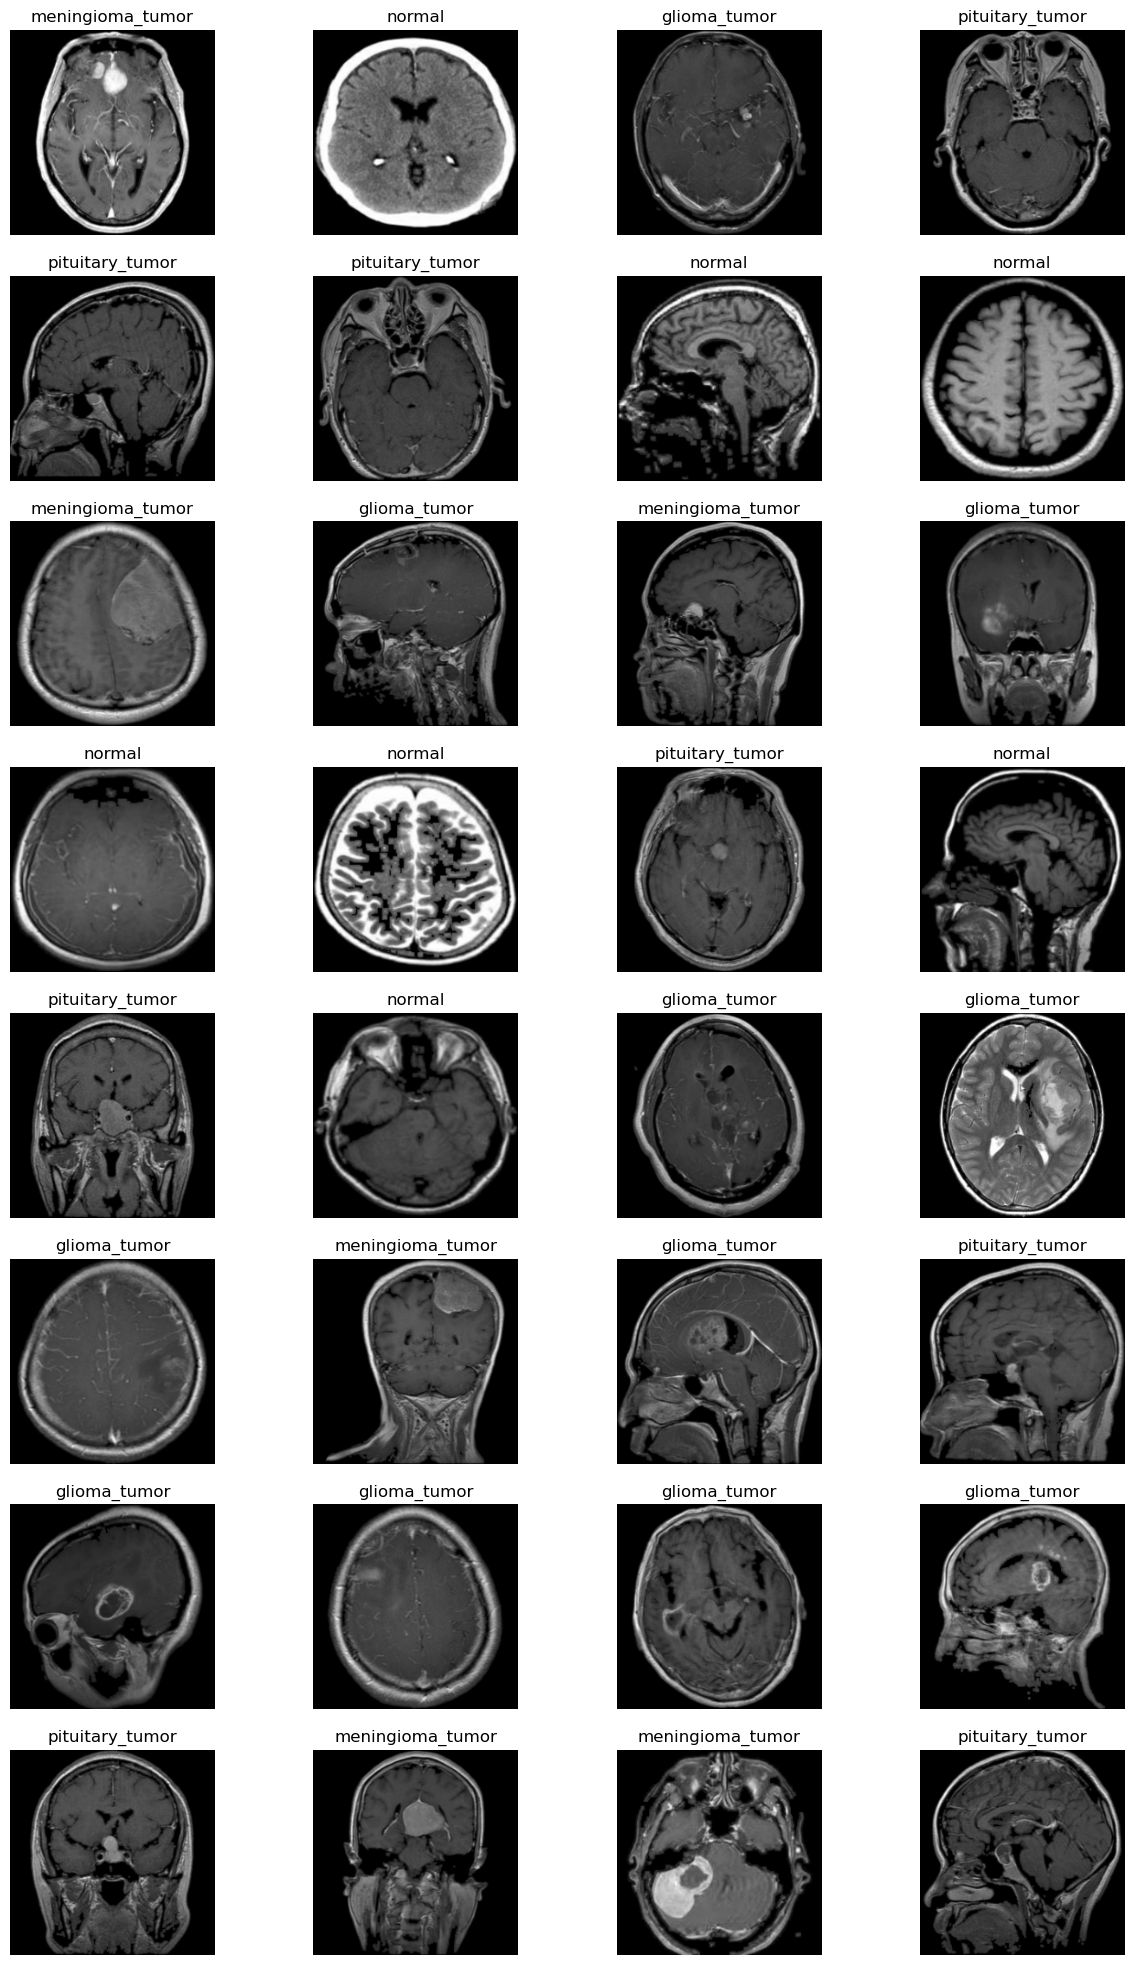

In [39]:
plt.figure(figsize=(15, 25))
for images, labels in train.take(1): # iterate over the 1st batch in train set
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Section 3: Model Training

# Section 4: Model Evaluation